## Funciones de Distribución de probabilidades

Las veces que ocurre una **variable aleatoria** para un número en concreto se llama Función de Distribución de Probabilidad (PDF->Probability Density Function), es decir que tome un valor exacto.

Función de Distribución Acumulativa (CDF -> Cumulative Density Function) se trata la probabilidad que una variable aleatoria sea menor o igual a un valor concreto.

Las funciones mas conocidas son:
* **_La curva Normal (campana de Gauss)_** 
* **_La distribución uniforme_**
* De Poisson
* La binomial 
* La multinomial


## La distribución Uniforme
Es aquella en que se tienen 2 puntos y la probabilidad de que ocurra algo entre esos dos puntos siempre es la misma

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99609., 100357., 100065.,  99533., 100354.,  99807., 100339.,
        100125., 100047.,  99764.]),
 array([ 1.00016677, 10.9001466 , 20.80012642, 30.70010625, 40.60008607,
        50.5000659 , 60.40004572, 70.30002555, 80.20000537, 90.0999852 ,
        99.99996503]),
 <BarContainer object of 10 artists>)

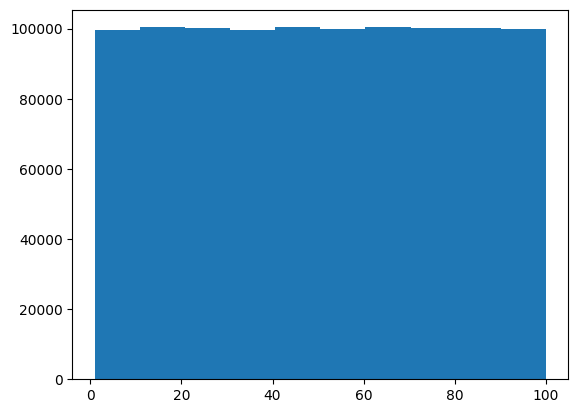

In [3]:
%matplotlib inline
plt.hist(data)

## La campana de Gauss
### Distribución Normal

In [4]:
data = np.random.randn(1000000) ##randn no crea numeros aleatorios en distribución normal standar con la media cero y la desviación tipica 1

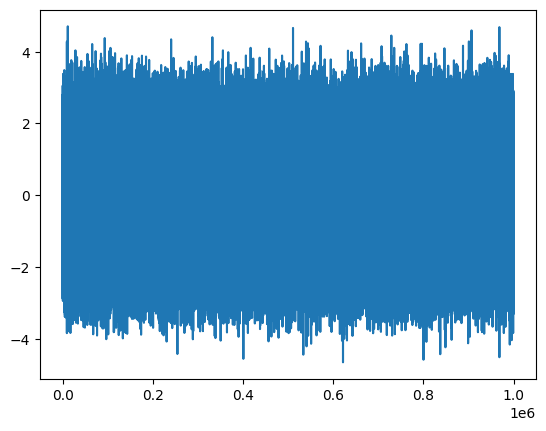

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.01000e+02, 2.63700e+03, 2.98440e+04, 1.49761e+05, 3.29361e+05,
        3.20854e+05, 1.38762e+05, 2.63250e+04, 2.27400e+03, 8.10000e+01]),
 array([-4.64499609, -3.71014132, -2.77528655, -1.84043178, -0.90557701,
         0.02927776,  0.96413253,  1.8989873 ,  2.83384207,  3.76869684,
         4.70355161]),
 <BarContainer object of 10 artists>)

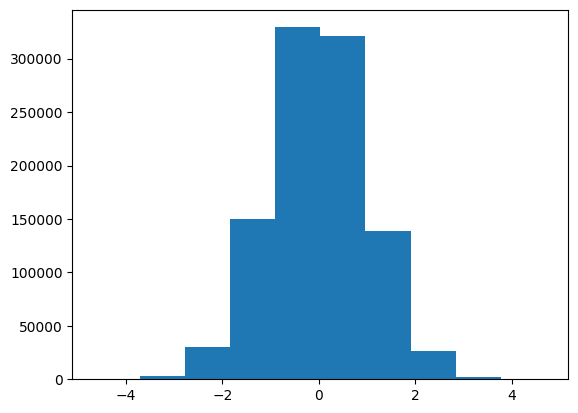

In [6]:
plt.hist(data)

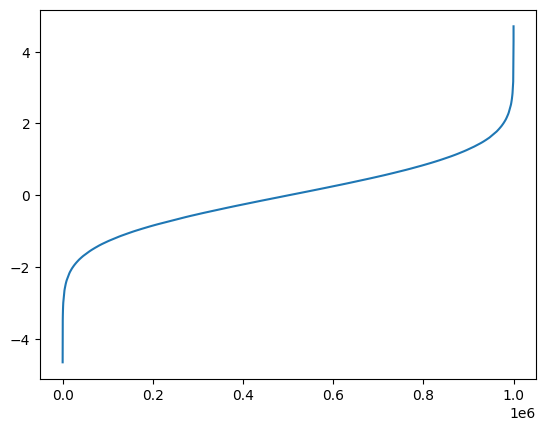

In [7]:
plt.plot(x,sorted(data)) ## forma de distribución acumulada d ela campna de gauss. Con sorted se ordenan los datos para este tipod e grafico

(array([   6.,   55.,  410., 1410., 2812., 2837., 1786.,  554.,  113.,
          17.]),
 array([-4.54835378, -2.59224053, -0.63612729,  1.31998595,  3.2760992 ,
         5.23221244,  7.18832568,  9.14443892, 11.10055217, 13.05666541,
        15.01277865]),
 <BarContainer object of 10 artists>)

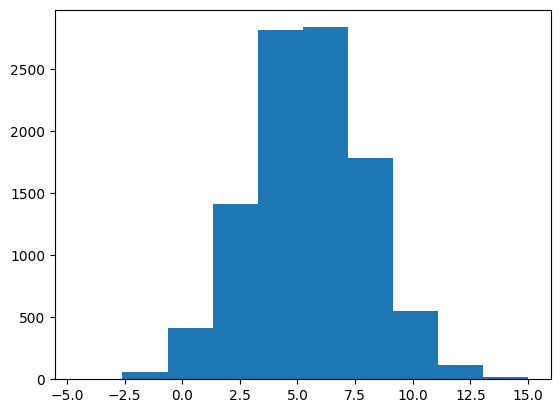

In [8]:
mu = 5.5 # mi propia media
sd = 2.5 # mi propia desviación estandar
data = mu + sd*np.random.randn(10000) # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)  ## Te genera dos muestras (arrays) de tamaño 4
data

array([[-0.85080607, -0.98256058,  0.461484  , -0.20502794],
       [ 1.1265602 ,  1.25120283, -1.72677294, -1.89901623]])

## La simulación de Monte Carlo

* Generamos dos número aleatorios uniformes x e y entre 0 y 1 en total 1000 veces
* Calcularemos x^2 + y^2
* Si el valor es inferior a 1 -> estamos dentro del círculo
* Si el valor es superior a 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos poara obtener una aproximación d ela probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces ( por ejejmplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedioo de los 100 experimentos anteriores para dar un valor fina π.

In [10]:
def pi_montecarLo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1419020000000017


(3.1419020000000017, [<matplotlib.lines.Line2D at 0x7f5bdfd2cf40>])

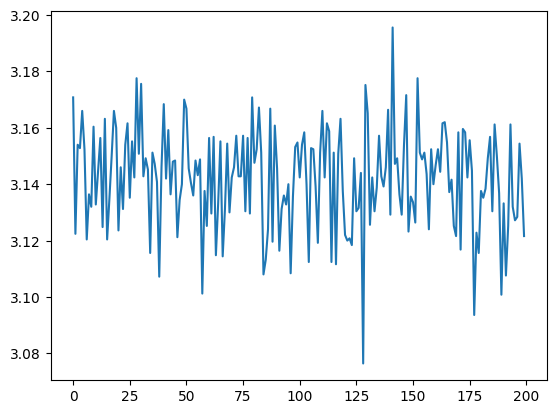

In [11]:
pi_montecarLo(10000, 200)

### Dummy Data Sets

In [13]:
data = pd.DataFrame({
    'A' : np.random.randn(10),
    'B' : 1.5 + 2.5 * np.random.randn(10),
    'C' : np.random.uniform(5, 32, 10)
})

In [14]:
data

,A,B,C
0,1.230376,-1.566243,18.493589
1,-2.226643,2.468155,29.122813
2,0.619050,3.453457,25.808350
3,-1.414060,2.554199,19.261812
4,1.409726,5.854717,16.071734
5,1.086020,-0.489515,8.672786
6,-1.333471,2.004035,14.323901
7,0.596368,-0.961563,11.949681
8,0.497464,4.279320,30.988451
9,-0.738924,1.695711,16.093150
